In [35]:
%matplotlib notebook

In [36]:
from path_finder import BFS, DFS, GreedySearch
from path_finder import AStarSearch
from graph_generator import read_input_file
from matplotlib import pyplot as plt
import time
from IPython.display import display
import os
import numpy as np
from PIL import Image
import csv


In [37]:
SEARCH_MAP = {
    "BFS": BFS,
    "DFS": DFS,
    "Greedy": GreedySearch,
    "A*": AStarSearch
}



In [38]:
def color_map(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap


_cmap = color_map(256)


# Animation Visualize

If you need to watch a certain method step by step visualize how agent move, run the block below

<IPython.core.display.Javascript object>


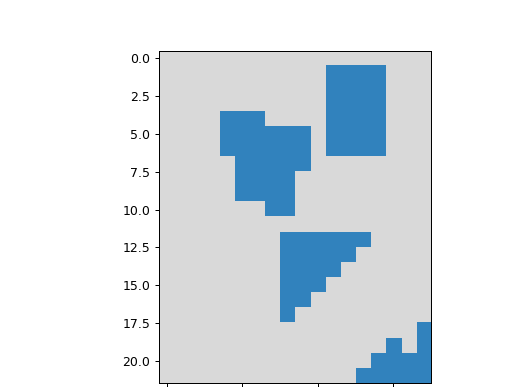

Found path


In [41]:
# Params for you to change
search_name = "BFS"
input_path = 'sample_input.txt'


matrix, start, goal = read_input_file(input_path, False)
Method = SEARCH_MAP[search_name]
path_finder = Method(start, goal)
path = path_finder.search(matrix)

fig = plt.figure()
fig.canvas.draw()

PATH_VALUE = 255
ALREADY_SEARCH_VALUE = 254
GOAL= 253

if path:
    print("Found path")
    matrix[path_finder.closed[:, :, 0] != -1] = ALREADY_SEARCH_VALUE
    matrix[path_finder.goal[0], path_finder.goal[1]] = GOAL
    for pos in path:
        matrix[pos] = PATH_VALUE
        plt.imshow(matrix, cmap="tab20c")
        fig.canvas.draw()
        plt.pause(0.5)
        plt.show()
else:
    print("Not found path")



# Report 

In [ ]:
input_list = ["sample_input.txt", "50x50__input.txt", "100x100__input.txt"]

PATH_VALUE = 255
ALREADY_SEARCH_VALUE = 254
GOAL= 253

report_folder = "reports/"
report_path = report_folder + "report.csv"
os.makedirs(report_folder, exist_ok=True)

report_data = []


for input_path in input_list:
    print(input_path)
    folder = report_folder + input_path.split(".")[0]
    os.makedirs(folder, exist_ok=True)
    for search_name in SEARCH_MAP:
        matrix, start, goal = read_input_file(input_path, False)
        Method = SEARCH_MAP[search_name]
        path_finder = Method(start, goal)
                
        start_time = time.clock()
        path = path_finder.search(matrix)
        end_time = time.clock()
        diff = end_time - start_time 
        if path:
            print(f"{search_name} found path in {diff} - Length path: {len(path)}")
            matrix[path_finder.closed[:, :, 0] != -1] = ALREADY_SEARCH_VALUE
            matrix[path_finder.goal[0], path_finder.goal[1]] = GOAL 
            for pos in path:
                matrix[pos] = PATH_VALUE
            
            # Store output
            img_pil = Image.fromarray(np.array(matrix, dtype=np.uint8), mode="L")
            img_pil.putpalette(_cmap)
            output_path = folder + f"/{search_name}_visualize.pdf"
#             plt.imshow(img_pil)
#             plt.imsave(output_path, img_pil)
            img_pil.save(output_path)
            
            
        else:
            print(f"{search_name} found there is not path in {diff}")
            
        report_data.append(
        {
            "filename": input_path,
            "search_name": search_name, 
            "run_time": diff,
            "length_path": len(path),
            "found?": bool(path),
            
        })
        


In [ ]:
def to_csv(report_data, report_path):
    keys = report_data[0].keys()
    with open(report_path, 'w') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(report_data)

to_csv(report_data, report_path)